In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Text(0.5, 1.0, 'Correlation heatmap')

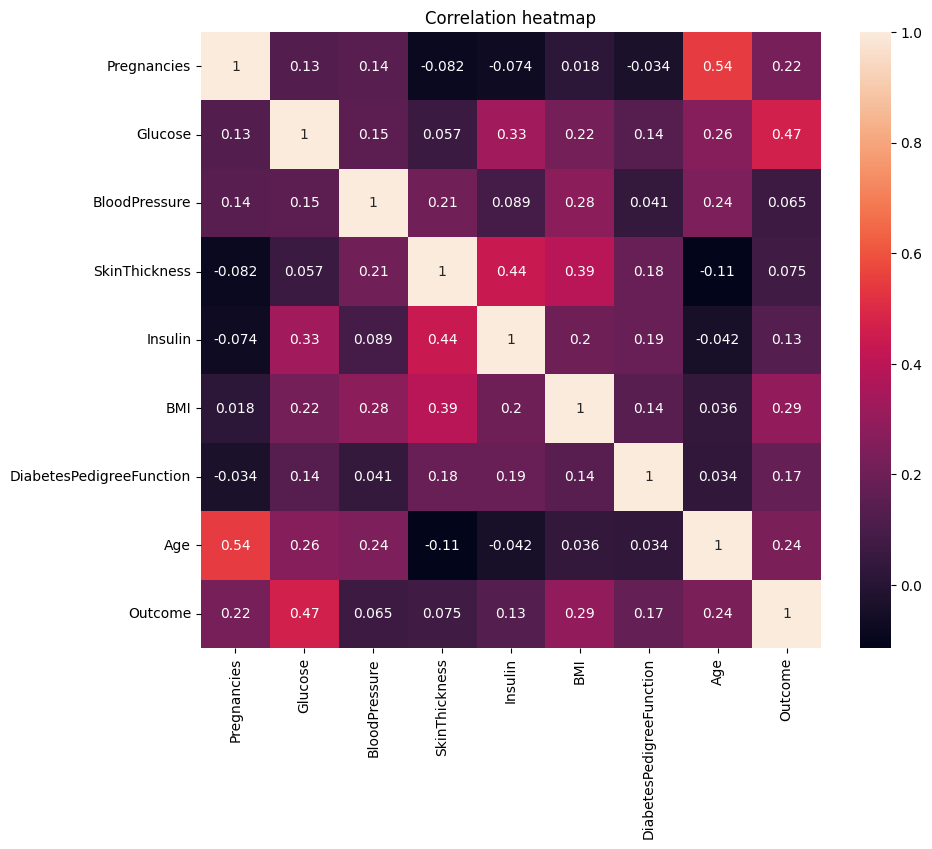

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation heatmap")

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
X=df[['Pregnancies','Glucose','Insulin','Age']]
y=df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy with logistic:', accuracy)

Accuracy with logistic: 0.7662337662337663


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)  # Experiment with different k values
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = model.predict(X_test)

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy with knn:', accuracy_knn)

Accuracy with knn: 0.7662337662337663


In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = model.predict(X_test)

# Evaluate model performance (accuracy in this case)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print('Accuracy with nayes bias:', accuracy_nb)

Accuracy with nayes bias: 0.7662337662337663


In [ ]:
model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = model_svc.predict(X_test)

# Evaluate model performance (accuracy in this case)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print('Accuracy with svc:', accuracy_svc)

Accuracy with svc: 0.7727272727272727


In [ ]:
model_dt= DecisionTreeClassifier(max_depth=5)
model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = model_dt.predict(X_test)

# Evaluate model performance (accuracy in this case)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy with DT:', accuracy_dt)

Accuracy with DT: 0.7467532467532467


In [ ]:
model_rfc= RandomForestClassifier(n_estimators=100)
model_rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rfc = model_rfc.predict(X_test)

# Evaluate model performance (accuracy in this case)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print('Accuracy with Random Forest:', accuracy_rfc)

Accuracy with Random Forest: 0.7142857142857143


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[85, 14],
       [22, 33]])

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[85, 14],
       [22, 33]])

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_nb

array([[85, 14],
       [22, 33]])

In [ ]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_svc

array([[87, 12],
       [23, 32]])

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt

array([[79, 20],
       [19, 36]])

In [ ]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
cm_rfc

array([[76, 23],
       [21, 34]])

In [ ]:
ensemble_model_hard = VotingClassifier(estimators=[('lr', model), ('knn', model_knn), ('nb', model_nb),
                                              ('svc', model_svc), ('dt', model_dt), ('rfc', model_rfc)],
                                  voting='hard')  # Experiment with 'soft' voting

In [ ]:
# Train the ensemble model
ensemble_model_hard.fit(X_train, y_train)

# Make predictions on the test set
y_pred_en_hard = ensemble_model_hard.predict(X_test)

# Evaluate model performance (accuracy in this case)
accuracy_en_hard = accuracy_score(y_test, y_pred_en_hard)
print('Ensemble Model Hard Accuracy:', accuracy_en_hard)

Ensemble Model Hard Accuracy: 0.7727272727272727


In [ ]:
ensemble_model_soft = VotingClassifier(estimators=[('lr', model), ('knn', model_knn), ('nb', model_nb),
                                              ('svc', model_svc), ('dt', model_dt), ('rfc', model_rfc)],
                                  voting='soft')  # Experiment with 'soft' voting
model_svc = SVC(probability=True) # Enable probability calculation for SVC
                                   # This will allow it to output probabilities for soft voting

# Train the ensemble model
ensemble_model_soft.fit(X_train, y_train)

# Make predictions on the test set
y_pred_en_soft = ensemble_model_soft.predict(X_test)

# Evaluate model performance (accuracy in this case)
accuracy_en_soft = accuracy_score(y_test, y_pred_en_soft)
print('Ensemble Model Soft Accuracy:', accuracy_en_soft)

Ensemble Model Soft Accuracy: 0.7532467532467533
